# Análisis exploratorio de datos

Objetivo: Limpiar los datos y preparar un informe que brinde información sobre los hábitos de compra de los clientes de Instacart. 

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen.

Diccionario de datos: Hay cinco tablas en el conjunto de datos

instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.
- 'order_id': número de ID que identifica de manera única cada pedido.
- 'user_id': número de ID que identifica de manera única la cuenta de cada cliente.
- 'order_number': el número de veces que este cliente ha hecho un pedido.
- 'order_dow': día de la semana en que se hizo un pedido (0 si es domingo).
- 'order_hour_of_day': hora del día en que se hizo el pedido.
- 'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.

products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.
- 'product_id': número ID que identifica de manera única cada producto.
- 'product_name': nombre del producto.
- 'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
- 'department_id': número ID que identifica de manera única cada departamento de víveres.

order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
- 'order_id': número de ID que identifica de manera única cada pedido.
- 'product_id': número ID que identifica de manera única cada producto.
- 'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
- 'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

aisles.csv
- 'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
- 'aisle': nombre del pasillo.

departments.csv
- 'department_id': número ID que identifica de manera única cada departamento de víveres.
- 'department': nombre del departamento.

El proyecto se divide en 3 partes:
1. Descripción de los datos.
2. Preprocesamiento de datos.
3. Análisis de los datos.

## Descripción de los datos.

Se importan las librerías que se van a utilizar:

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

Se leen y examinan los archivos que contienes los datos: 

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv') 
products = pd.read_csv('/datasets/products.csv')
aisles = pd.read_csv('/datasets/aisles.csv')
departments = pd.read_csv('/datasets/departments.csv') 
order_products = pd.read_csv('/datasets/order_products.csv') 

Verificar los datos de los dataframes:

In [3]:
orders.head(2)

,order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0,1515936;183418;11;6;13;30.0
1,1690866;163593;5;5;12;9.0


In [4]:
products.head(2)

,product_id;product_name;aisle_id;department_id
0,1;Chocolate Sandwich Cookies;61;19
1,2;All-Seasons Salt;104;13


In [5]:
aisles.head(2)

,aisle_id;aisle
0,1;prepared soups salads
1,2;specialty cheeses


In [6]:
departments.head(2)

,department_id;department
0,1;frozen
1,2;other


In [7]:
order_products.head(2) 

,order_id;product_id;add_to_cart_order;reordered
0,2141543;11440;17.0;0
1,567889;1560;1.0;1


Los 5 archivos CSV utilizan ';' como separador, por lo que es necesario establecer este parámetro para lograr una correcta visualización.

In [8]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';') 
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';') 
order_products = pd.read_csv('/datasets/order_products.csv', sep=';') 

Mostrar la información general de los datos de cada dataframe:

In [9]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Hay valores ausentes en la columan 'days_since_prior_order'. Los tipos de datos almacenados son correctos.

In [10]:
products.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Hay valores ausentes en 'product_name'. Los tipos de datos almacenados son correctos.

In [11]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


No hay valores ausentes. Los tipos de datos almacenados son correctos.

In [12]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


No hay valores ausentes. Los tipos de datos almacenados son correctos.

In [13]:
#Se utiliza show_counts=True para que se muestran los valores ausentes cuando hay muchos datos
order_products.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


No hay valores ausentes. Los tipos de datos almacenados son correctos.

## Preprocesamiento de datos

Encontrar y eliminar los valores duplicados y ausentes:

### DataFrame `orders`

In [14]:
# Verifica si hay filas totalmente duplicadas
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Hay líneas duplicadas y todas tienen mismo día y hora de pedido (miércoles 2:00am)

In [15]:
#Verificar todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

Hay 121 pedidos que se hicieron el miércoles a las 2am.

In [16]:
#Eliminar los pedidos duplicados
orders = orders.drop_duplicates()

In [17]:
#Encuentra los valores ausentes de la columna 'days_since_prior_order'
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [18]:
#Verificar si hay algún valor ausente que no sea el primer pedido del cliente
orders[orders['order_number'] == 1].isna().value_counts()

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False         False      False              True                      28817
dtype: int64

No hay valores ausente que no sea el primer pedido del cliente, por lo que es seguro afirmar estos valores están ausentes porque era el primer pedido, por lo que no había información para 'días desde el último pedido'.

Verificar que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables (es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6):

In [19]:
orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [20]:
orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

Los valores de 'order_hour_of_day' y 'order_dow' son razonables, ya que están entre 0-23 y 0-6, respectivamente.

### DataFrame `products`

In [21]:
#Verifica si hay filas totalmente duplicadas
products[products.duplicated()]

,product_id,product_name,aisle_id,department_id


No hay filas duplicadas.

In [22]:
#Encuentra los valores ausentes en la columna 'product_name'
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Hay 1258 filas con valores ausentes.

In [23]:
#Verificar si todos los nombres de productos ausentes están relacionados con el pasillo con ID 100
products[products['aisle_id'] == 100].isna().value_counts()

product_id  product_name  aisle_id  department_id
False       True          False     False            1258
dtype: int64

In [24]:
#Verificar si todos los nombres de productos ausentes están relacionados con el departamento con ID 21
products[products['department_id'] == 21].isna().value_counts()

product_id  product_name  aisle_id  department_id
False       True          False     False            1258
dtype: int64

In [25]:
#Utilizar las columnas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
products[(products['department_id'] == 21) & (products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Aparentemente todos los valores de 'nombres de producto' relacionados con el pasillo ID `100` y departamento ID `21` están ausentes. Es probable que esto se deba a algún tipo de problema en el pasillo `100` y el departamento `21`.

No tengo de donde sacar la información faltante y al ser una variables cualitativa reemplazaré los valores ausentes por 'unknown':

In [26]:
# Completar los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

### DataFrame `aisles`

In [27]:
#Revisar si hay filas totalmente duplicadas
aisles[aisles.duplicated()]

,aisle_id,aisle


No hay filas duplicadas.

### DataFrame `departments`

In [28]:
#Revisar si hay filas totalmente duplicadas
departments[departments.duplicated()]

,department_id,department


No hay valores duplicados.

### DataFrame `order_products`

In [29]:
#Revisa si hay filas totalmente duplicadas
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


No hay valores duplicados.

In [30]:
#Encuentrar los valores ausentes de la columna 'add_to_cart_order'
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
#Verificar los valores mínimos y máximos en esta columna
print('Valores mínimos:', order_products['add_to_cart_order'].min())
print('Valores máximos:', order_products['add_to_cart_order'].max())

Valores mínimos: 1.0
Valores máximos: 64.0


Lo mínimo que las personas piden es 1 artículo y lo máximo con 64. Tal vez el maximo de 'add_to_cart_order' se detiene en 64 porque es el máximo de artículos que se permiten por pedido. 

In [32]:
#Remplazar los valores ausentes en la columna 'add_to_cart' con 999 y convertir la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int') 

## Análisis de los datos

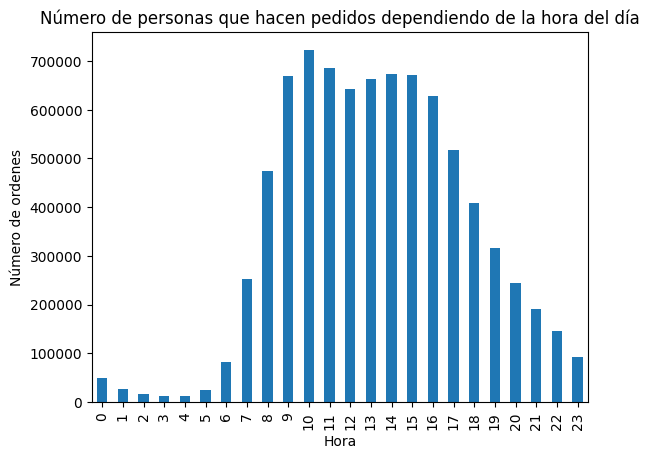

In [33]:
#Verificar para cada hora del día, cuántas personas hacen órdenes
hora = orders.groupby('order_hour_of_day')['order_number'].sum()

hora.plot(kind='bar',
          xlabel='Hora',
          ylabel='Número de ordenes',
          title='Número de personas que hacen pedidos dependiendo de la hora del día')

plt.show()

Las horas de la madrugada es el tiempo con menos actividad. Entre las 9am y las 4pm son las horas que las personas más pedidos hacen.

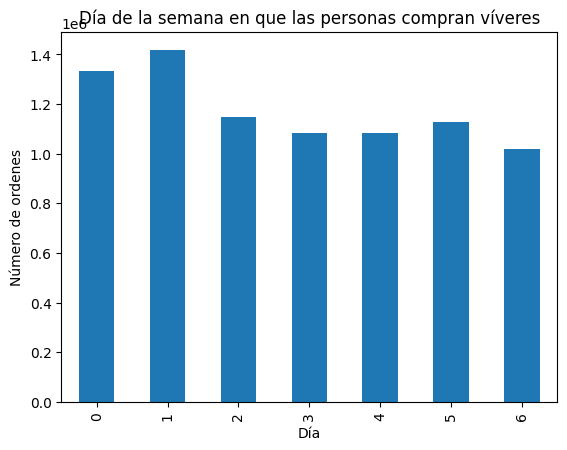

In [34]:
#Verificar, qué día de la semana compran víveres las personas
dia = orders.groupby('order_dow')['order_number'].sum()

dia.plot(kind='bar', 
         xlabel='Día', 
         ylabel='Número de ordenes', 
         title='Día de la semana en que las personas compran víveres')  
plt.show()

Todos los días compran víveres las personas, sin embargo domingo y lunes son los días que más actividad presentan.

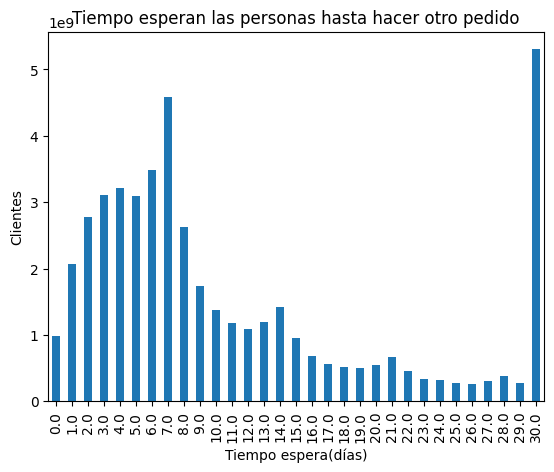

In [35]:
#Verificar, cuánto tiempo esperan las personas hasta hacer otro pedido
tiempo_espera = orders.groupby('days_since_prior_order')['user_id'].sum()

tiempo_espera.plot(kind='bar', 
         xlabel='Tiempo espera(días)', 
         ylabel='Clientes', 
         title='Tiempo esperan las personas hasta hacer otro pedido')
plt.show()

La mayoría de personas esperan 30 y 7 días antes de hacer un nuevo pedido.

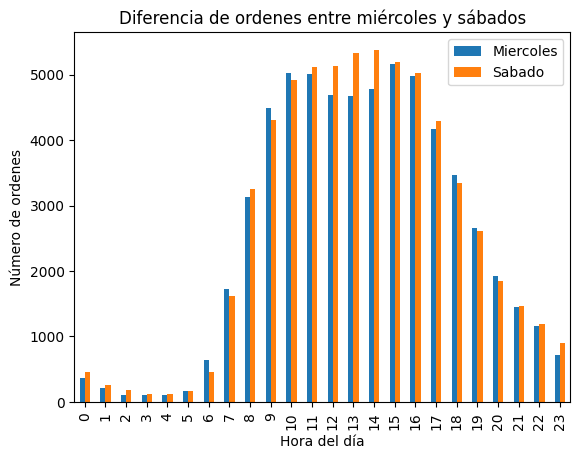

In [36]:
#Verificar si existe alguna diferencia entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados
wed = orders['order_dow'] == 3
hod_counts_wed = orders[wed]['order_hour_of_day'].value_counts().sort_index()

sat = orders['order_dow'] == 6
hod_counts_sat = orders[sat]['order_hour_of_day'].value_counts().sort_index()

hod_counts = pd.concat([hod_counts_wed, hod_counts_sat], axis=1)
hod_counts.columns = ['Miercoles', 'Sabado']

hod_counts.plot(kind='bar',
                title='Diferencia de ordenes entre miércoles y sábados',
                xlabel='Hora del día',
                ylabel='Número de ordenes')             
plt.show()

Ambos días tienen un comportamiento muy similar a lo largo del día. Los sábados de 12-2pm se puede observar que hay un poco más de actividad que los miércoles.

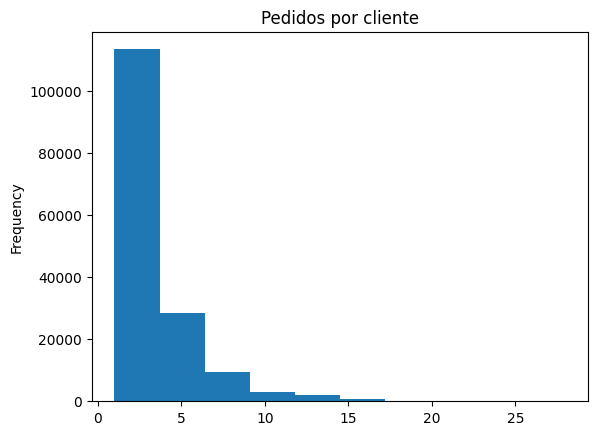

In [37]:
#Verificar la distribución para el número de pedidos por cliente
pedidos = orders.groupby('user_id')['order_number'].count()

pedidos.plot(kind='hist', 
         xlabel='Número de pedidos', 
         ylabel='Número de clientes', 
         title='Pedidos por cliente')  
plt.show()

La mayoría de clientes hace menos de 10 pedidos.

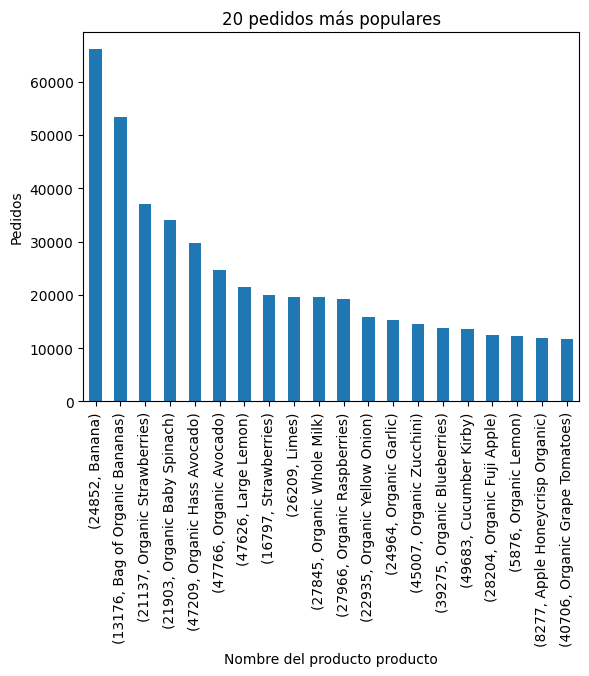

In [38]:
#Verificar cuáles son los 20 productos más populares
df = products.merge(order_products, on='product_id')

populares = df.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False)
pop = populares.head(20)

pop.plot(kind='bar', 
         xlabel='Nombre del producto producto', 
         ylabel='Pedidos', 
         title='20 pedidos más populares')  
plt.show()

El producto que más se pide, por mucho, es bananas, seguido de las fresas, espinaca bebé y aguacate.

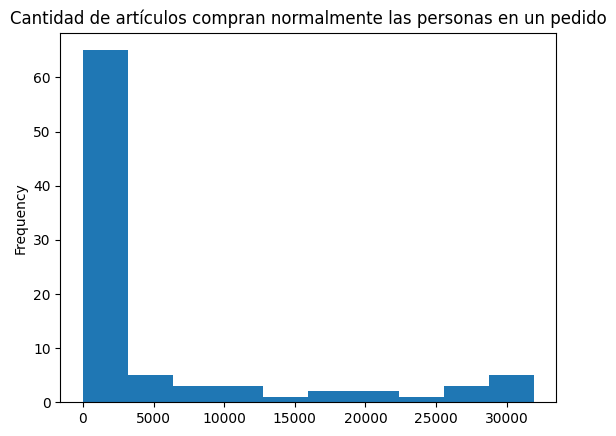

In [39]:
#Verificar cuántos artículos compran normalmente las personas en un pedido
pedido = order_products.groupby('order_id')['product_id'].count()
ped = pedido.value_counts().sort_index()

ped.plot(kind='hist', 
         title='Cantidad de artículos compran normalmente las personas en un pedido')  
         
plt.show()

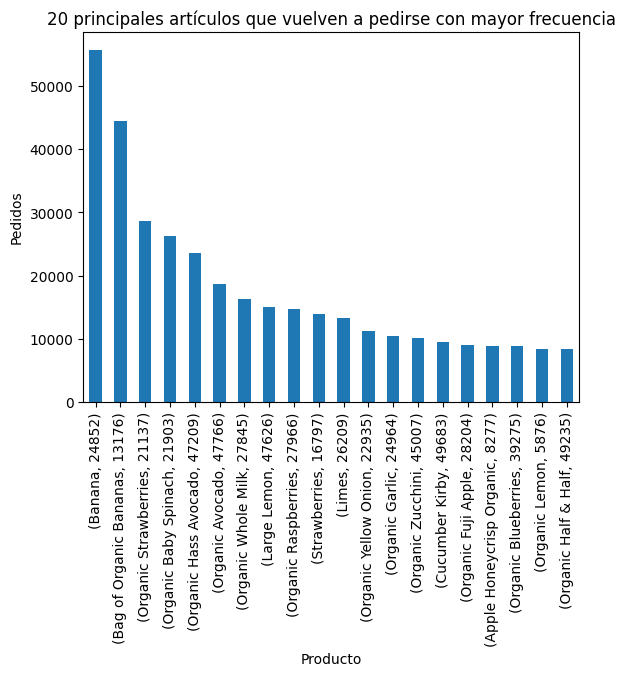

In [40]:
#Verificar cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia 
df1 = order_products.merge(products, on='product_id')

reorder = df1.groupby(['product_name', 'product_id'])['reordered'].sum().sort_values(ascending=False)
re = reorder.head(20)

re.plot(kind='bar', 
         xlabel='Producto', 
         ylabel='Pedidos', 
         title='20 principales artículos que vuelven a pedirse con mayor frecuencia')    
plt.show()

Los productos que más se vuelve a ordenar, coinciden con los que más populares.

In [41]:
#Verificar para cada producto, cuál es la proporción de las veces que se pide y que se vuelve a pedir
df_merge = order_products.merge(products)

reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean()

reorder_rate_as_df = reorder_rate.sort_values(ascending=False).reset_index()
reorder_rate_as_df.sort_values(by='product_id')
reorder_rate_as_df

,product_id,product_name,reordered
0,14721,Bone Strength Take Care,1.0
1,20949,Vanilla Sandwich Cookies,1.0
2,6723,Palmiers- Petite,1.0
3,6732,Naturally Sparkling Mineral Water,1.0
4,45088,California Dill Pollen & Garlic Goat Cheese & ...,1.0
...,...,...,...
45568,10485,Caramel Apple Pop,0.0
45569,37690,Calypso Fresh 2X Concentrated ScentSations 166...,0.0
45570,10484,Avocado And Greens,0.0
45571,10474,NuStevia White Stevia Powder,0.0


Se puede observar que hay productos que su porcentaje es 0, lo que nos indica que no se vuelve a pedir. Sería bueno analizar si vale la pena seguir ofreciendo estos productos.

In [42]:
#Verificar cuáles son los 20 principales artículos que las personas ponen primero en sus carritos
proporcion_productos = df.groupby('product_name')['add_to_cart_order'].count().sort_values(ascending=False)
proporcion_productos.head(20)

product_name
Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: add_to_cart_order, dtype: int64

Los principales artículos que los clientes suelen poner primero en su carrito, son los mismos que están entre los más pedidos y los que vuelven a pedir.

# Conclusión
Para empezar se leyeron los archivos de datos con los parametros necesario para tener una buena lectura de la información. A partir de esto se obtuvo información general de los datos para tener una idea de lo que cada 
archivo contenía. Se importó la librería pandas para poder hacer todas las tareas basicas y la librería matplotlib para crear gráficos.

Se identificaron y completaron los valores ausentes, al igual que se identificaron y eliminaron los valores duplicados. En esta primera parte se encontró que Los valores ausentes de ‘orders’ se debe a que es la primera orden de los clientes, mientras que los valores ausentes de ‘order_producto’ se debe a algún problea en el pasillo `100` y el departamento `21`.

- Las horas de la madrugada es el tiempo con menos actividad. Entre las 9am y las 4pm son las horas que las personas más pedidos hacen.
- Todos los días compran víveres las personas, sin embargo domingo y lunes son los días que más actividad presentan.
- La mayoría de personas esperan 30 y 7 días antes de hacer un nuevo pedido.
- Los sábados de 12-2pm se puede observar que hay un poco más de actividad que los miércoles. Sin embargo, ambos tienen un comportamiento muy similar a lo largo del día.
- Los productos que más se vendes son las bananas, seguido de las fresas, espinaca bebé y aguacate.
- En promedio las personas compran menos de 10 artículos por pedido.
- Los productos que más se vuelve a ordenar, coinciden con los que más populares.
- Hay productos que se porcentaje de reorden (que se vuelven a pedir) es 0, lo que nos indica que no se vuelve a pedir. Sería bueno analizar si vale la pena seguir ofreciendo estos productos.
- Los principales artículos que los clientes suelen poner primero en su carrito, son los mismos que están entre los más pedidos y los que más se vuelven a pedir.